In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from utils import logit_transform, trim_ones_and_zeros
from utils import preprocess_agreement_score_dataset

In [93]:
# Factor to shift 1s and 0s by to allow for log transformation
BODGE_FACTOR = 0.5

In [94]:
# Path to datastore
data_path = '/home/mclancy/truespikes/data/static_tetrode_dataset.hd5'
data = preprocess_agreement_score_dataset(data_path)

Loaded from cache


/home/mclancy/.local/share/.pyenv/versions/3.8.3/envs/truespikes/lib/python3.8/site-packages/tables/array.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (oid, self.atom, self.shape, self._v_chunkshape) = self._open_array()
/home/mclancy/.local/share/.pyenv/versions/3.8.3/envs/truespikes/lib/python3.8/site-packages/tables/atom.py:1224: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return pickle.loads(array.tostring())


In [95]:
data['nn_hit_rate'] = trim_ones_and_zeros(data[['nn_hit_rate']], trim=0.01)

<AxesSubplot:xlabel='nn_hit_rate', ylabel='Count'>

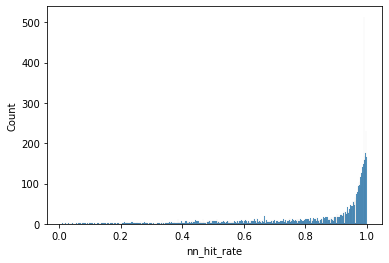

In [96]:
sns.histplot(data['nn_hit_rate'], bins=1000)

<AxesSubplot:xlabel='nn_hit_rate', ylabel='Count'>

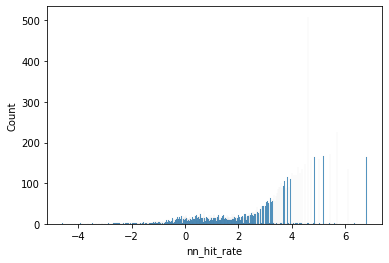

In [97]:
sns.histplot(logit_transform(data['nn_hit_rate']), bins=1000)

<AxesSubplot:ylabel='Count'>

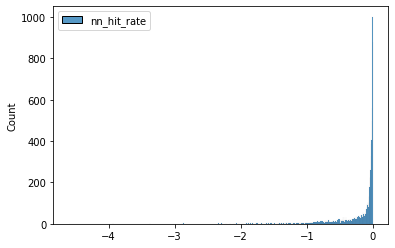

In [99]:
sns.histplot(np.log(data[['nn_hit_rate']]), bins=1000)
